In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import hashlib

In [4]:
def load_bill_data():
    path = "Purchase_Card_Transactions.csv"
    return pd.read_csv(path)

In [5]:
bill = load_bill_data()
bill.head()

,OBJECTID,AGENCY,TRANSACTION_DATE,TRANSACTION_AMOUNT,VENDOR_NAME,VENDOR_STATE_PROVINCE,MCC_DESCRIPTION
0,2,Department of Mental Health,2009/01/05 05:00:00+00,229.50,WW GRAINGER 912,DC,"Industrial Supplies, Not Elsewhere Classified"
1,3,District Department of Transportation,2009/01/05 05:00:00+00,3147.33,BRANCH SUPPLY,DC,"Stationery, Office & School Supply Stores"
2,4,Department of Youth Rehabilitation Services,2009/01/05 05:00:00+00,54.00,VIDEO MONITORING SRVCS,NY,Motion Pictures/Video Tape Production&Distribu...
3,5,Office of Employee Appeals,2009/01/05 05:00:00+00,137.35,STAPLES 00102186,DC,"Stationery,Office Supplies,Printing/Writing Paper"
4,6,Office of Police Complaints,2009/01/06 05:00:00+00,1340.80,FAITH MGMT CONSULTING,DC,"Stationery, Office & School Supply Stores"


In [6]:
bill.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 433926 entries, 0 to 433925
Data columns (total 7 columns):
OBJECTID                 433926 non-null int64
AGENCY                   433926 non-null object
TRANSACTION_DATE         433926 non-null object
TRANSACTION_AMOUNT       433926 non-null float64
VENDOR_NAME              433887 non-null object
VENDOR_STATE_PROVINCE    432623 non-null object
MCC_DESCRIPTION          433908 non-null object
dtypes: float64(1), int64(1), object(5)
memory usage: 23.2+ MB


In [14]:
bill["AGENCY"].value_counts()

District of Columbia Public Schools                      56852
District Department of Transportation                    25480
Fire & Emergency Medical Services                        23123
Department on Disability Services                        20487
Department of Health                                     17220
Department of  Youth Rehabilitation Services             16001
Metropolitan Police Department                           15814
District Department of the Environment                   14819
Department of Mental Health                              14530
Office of the State Superintendent of Education          14492
Department of Public Works                               14041
Department of Human Services                             12538
Office of the Chief Financial Officer                    10996
DC Public Library                                        10494
Department of Property Management                         9224
University of the District of Columbia                 

In [8]:
bill["VENDOR_NAME"].value_counts()

STANDARD OFFICE SUPPLY      17075
AMAZON MKTPLACE PMTS        14699
METRO FARE AUTOLOAD         12622
AMZN MKTP US                 9542
AMAZON.COM                   8485
METROPOLITAN OFFICE PR       7076
OFFICE DEPOT #5910           6256
THE HOME DEPOT #2583         4069
CAPITAL SERVICES AND S       3843
LASER ART INC                3260
PAYPAL                       3202
CAPITAL SERVICES & SUP       3071
WW GRAINGER                  3046
SENODA INC                   2538
COMCAST OF WASHINGTON        2257
AMERICAN AIRLINES            2249
COMCAST                      2030
SOUTHWEST                    1924
STAPLES DIRECT               1876
AMERICAN BUSINESS SUPP       1763
DMI* DELL K-12/GOVT          1424
STAPLES       00102186       1422
CDW GOVERNMENT               1418
NBA OFFICE PRODUCTS, I       1386
AOP BUSINESS SERVICES        1301
THOMSON WEST*TCD             1277
MVS INC                      1277
U.S. OFFICE SOLUTIONS        1246
DC BAR                       1194
THE HAMILTON G

In [9]:
bill["VENDOR_STATE_PROVINCE"].value_counts()

DC     152192
MD      54022
WA      41166
CA      30442
VA      23184
TX      14160
IL      13715
PA      12998
NY       9010
GA       7421
MA       7112
TN       7010
FL       6536
MN       5403
OH       5260
NJ       5012
WI       4109
CT       3960
NC       3242
MO       2702
CO       2365
KS       1883
AZ       1875
MI       1602
NV       1602
UT       1403
IN       1347
KY       1280
NE       1141
OR       1002
        ...  
NB          2
QLD         2
VA          2
BEI         2
D           2
ARE         2
CN          2
ILS         2
TX          2
VIR         2
ES          1
MN          1
NJ          1
VN          1
C           1
IO          1
CT          1
ITA         1
BGR         1
280         1
JO          1
IND         1
RUS         1
MD          1
SVN         1
69          1
PAN         1
ZH          1
PE          1
ISL         1
Name: VENDOR_STATE_PROVINCE, Length: 132, dtype: int64

In [10]:
bill["MCC_DESCRIPTION"].value_counts()

Book Stores                                           24198
Stationery, Office & School Supply Stores             22884
Stationery,Office Supplies,Printing/Writing Paper     16396
Business Services Not Elsewhere Classified            15098
BOOK STORES                                           14533
Local/Suburban Commuter Transportation                14522
Computers,Computer Peripheral Equipment, Software      9722
Charitable And Social Service Organizations            8200
Membership Organizations, Not Elsewhere Classified     7777
Educational Services, Not Elsewhere Classified         7722
Specialty Retail Stores-Miscellaneous                  7433
Government Services, Not Elsewhere Classified          6674
Industrial Supplies, Not Elsewhere Classified          6424
Professional Services Not Elsewhere Classified         6083
Direct Marketing-Not Elsewhere Classified              6082
Home Supply Warehouse Stores                           5762
Direct Marketing - Comb. Catalog &Retail

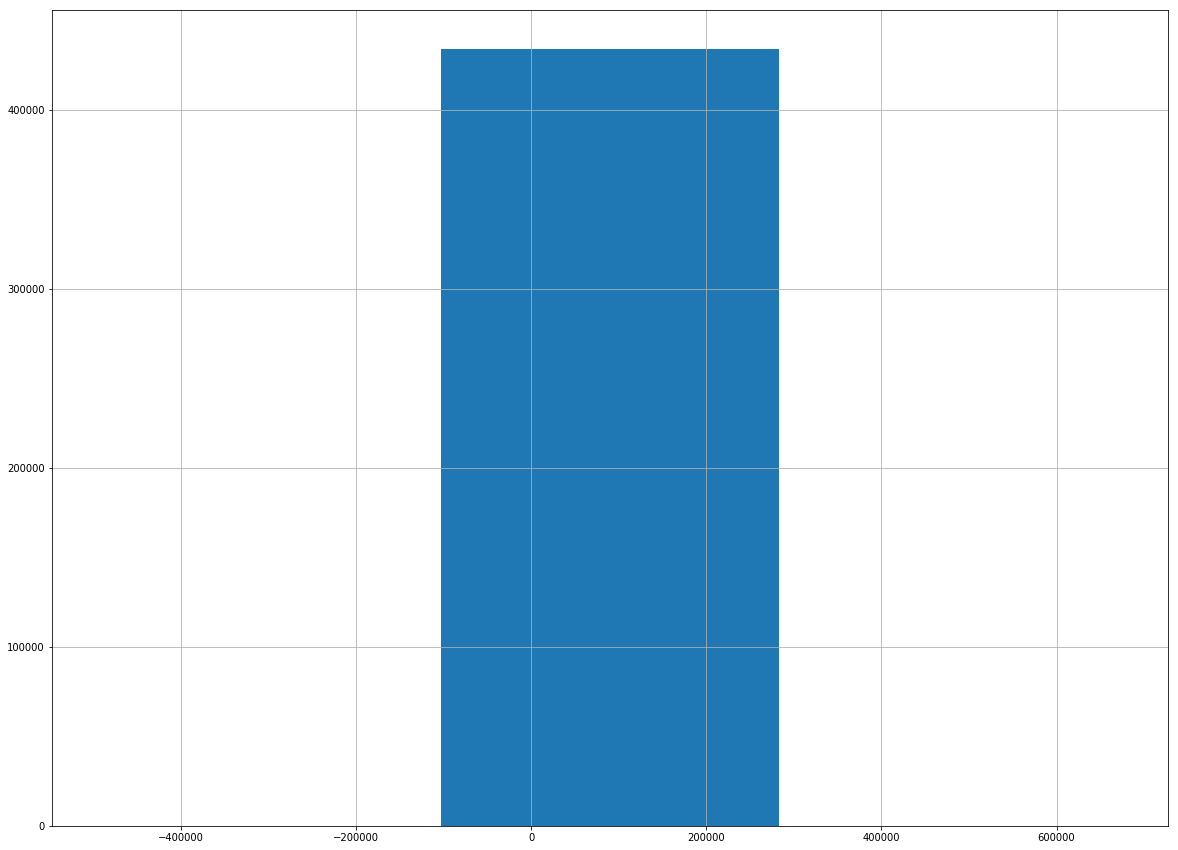

In [12]:
%matplotlib inline
bill['TRANSACTION_AMOUNT'].hist(bins = 3, figsize=(20,15))

In [37]:
from sklearn.model_selection import train_test_split
drop_bill = bill.dropna(subset=['VENDOR_NAME', "VENDOR_STATE_PROVINCE"])
train_set, test_set = train_test_split(drop_bill, test_size=0.2, random_state=42)

billing = train_set.drop("TRANSACTION_AMOUNT", axis = 1)
billing_labels = train_set["TRANSACTION_AMOUNT"].copy()

train_set.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 346098 entries, 268261 to 122177
Data columns (total 7 columns):
OBJECTID                 346098 non-null int64
AGENCY                   346098 non-null object
TRANSACTION_DATE         346098 non-null object
TRANSACTION_AMOUNT       346098 non-null float64
VENDOR_NAME              346098 non-null object
VENDOR_STATE_PROVINCE    346098 non-null object
MCC_DESCRIPTION          346098 non-null object
dtypes: float64(1), int64(1), object(5)
memory usage: 21.1+ MB


In [35]:
billing_drop_min = billing.groupby('VENDOR_NAME').filter(lambda x : len(x)>4)
billing_drop_min.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 288541 entries, 268261 to 122177
Data columns (total 6 columns):
OBJECTID                 288541 non-null int64
AGENCY                   288541 non-null object
TRANSACTION_DATE         288541 non-null object
VENDOR_NAME              288541 non-null object
VENDOR_STATE_PROVINCE    288541 non-null object
MCC_DESCRIPTION          288541 non-null object
dtypes: int64(1), object(5)
memory usage: 15.4+ MB


In [31]:
# 处理文本信息
# 处理日期数据
# billing_dropped = billing.dropna(subset=['VENDOR_NAME'])
# billing_no_state = billing_dropped.drop("VENDOR_STATE_PROVINCE", axis = 1)
# billing_w_state = billing_dropped.dropna(subset=["VENDOR_STATE_PROVINCE"])
# billing_no_state.info()